# Assignment 6

### <span style="color:chocolate"> Submission requirements </span>

Your work will not be graded if your notebook doesn't include output. In other words, <span style="color:red"> make sure to rerun your notebook before submitting to Gradescope </span> (Note: if you are using Google Colab: go to Edit > Notebook Settings  and uncheck Omit code cell output when saving this notebook, otherwise the output is not printed).

Additional points may be deducted if these requirements are not met:
    
* Comment your code;
* Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own;
* Try and minimize the use of the global namespace (meaning, keep things inside functions).

``Objectives``

* This assignment connects all the pieces involved in training feed-forward fully connected neural networks (FFNN); 

* You will run a full set of experiments to explore different hyperparameters and hidden layer sizes for two datasets, and then document your findings.

``Data``
* Digits MNIST
* Fashion MNIST

### Import libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

from keras.datasets import fashion_mnist
from keras.datasets import mnist

import tensorflow as tf
from tensorflow import keras
from keras import metrics
tf.get_logger().setLevel('INFO')

2025-02-23 19:06:44.090580: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


---
### Step 1: Data ingestion

In [2]:
# Load the Fashion MNIST dataset.
(X_train_fashion, Y_train_fashion), (X_test_fashion, Y_test_fashion) = fashion_mnist.load_data()

# Load the Digits MNIST dataset.
(X_train_digits, Y_train_digits), (X_test_digits, Y_test_digits) = mnist.load_data()

---
### Step 2: Data preprocessing

``Fashion MNIST``

In [3]:
# Normalize
X_train_fashion = X_train_fashion / 255.
X_test_fashion = X_test_fashion / 255.

# Flatten Y_train and Y_test, so they become vectors of label values.
Y_train_fashion = Y_train_fashion.flatten()
Y_test_fashion = Y_test_fashion.flatten()

label_names = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

# Apply random shufflying to training examples.
np.random.seed(0)
indices = np.arange(X_train_fashion.shape[0])
shuffled_indices = np.random.permutation(indices)
X_train_fashion = X_train_fashion[shuffled_indices]
Y_train_fashion = Y_train_fashion[shuffled_indices]

``Digits MNIST``

In [4]:
# Normalize
X_train_digits = X_train_digits / 255.
X_test_digits = X_test_digits / 255.

# Flatten Y_train and Y_test, so they become vectors of label values.
Y_train_digits = Y_train_digits.flatten()
Y_test_digits = Y_test_digits.flatten()

# Apply random shufflying to training examples.
np.random.seed(0)
indices = np.arange(X_train_digits.shape[0])
shuffled_indices = np.random.permutation(indices)
X_train_digits = X_train_digits[shuffled_indices]
Y_train_digits = Y_train_digits[shuffled_indices]

---
### Step 3: Exploratory data analysis (EDA)

### <span style="color:chocolate">Exercise 1:</span> Getting to know your data (5 points)

Complete the following task:

1. Show the first training example in X_train_fashion;
2. Show the first training example in X_train_digits;
3. Display the first 5 images in X_train_digits for each class in Y_train_digits, arranged in a 10x5 grid. 

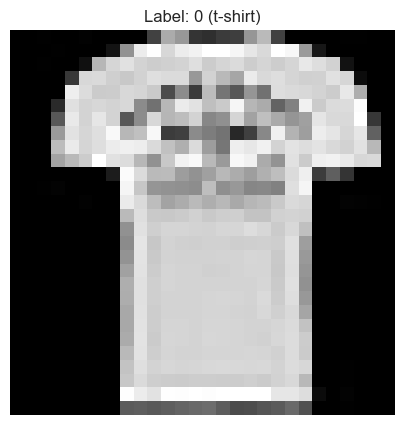

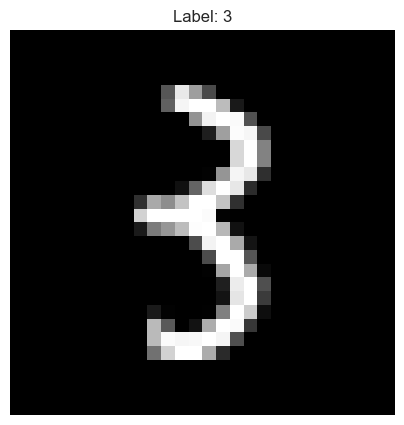

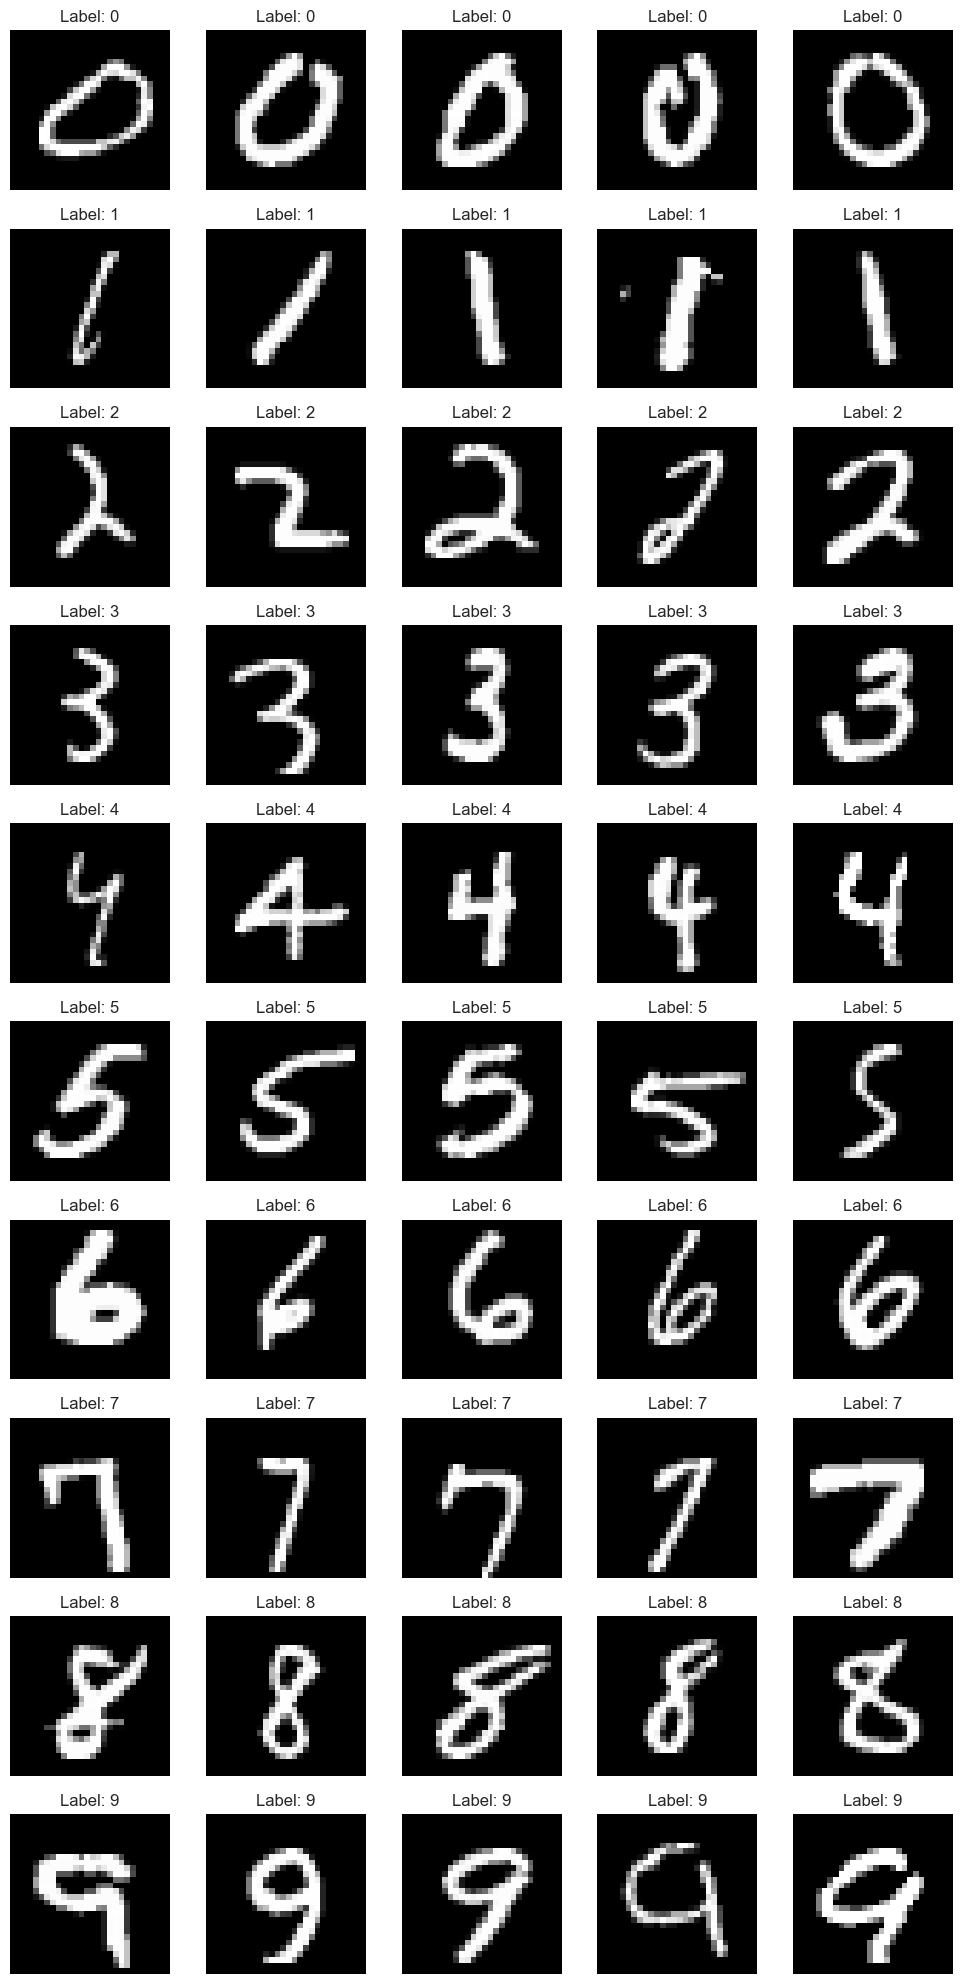

In [5]:
# YOUR CODE HERE
#print(X_train_fashion[::1])
import numpy as np
import matplotlib.pyplot as plt

# Show the first training example in X_train_fashion
plt.figure(figsize=(5, 5))
plt.imshow(X_train_fashion[0], cmap='gray') 
plt.title(f"Label: {Y_train_fashion[0]} ({label_names[Y_train_fashion[0]]})")
plt.axis('off')
plt.show()

# Show the first training example in X_train_digits
plt.figure(figsize=(5, 5))
plt.imshow(X_train_digits[0], cmap='gray')
plt.title(f"Label: {Y_train_digits[0]}")
plt.axis('off')
plt.show()

# Display the first 5 images in X_train_digits for each class in Y_train_digits
plt.figure(figsize=(10, 20))

# Loop through each class (0-9)
for digit_class in range(10):
    # Find indices of the first 5 images for this class
    indices = np.where(Y_train_digits == digit_class)[0][:5]
    
    # Plot the 5 images for this digit class
    for i, idx in enumerate(indices):
        plt.subplot(10, 5, digit_class * 5 + i + 1)  # 10 rows, 5 columns
        plt.imshow(X_train_digits[idx], cmap='gray')
        plt.title(f"Label: {digit_class}")
        plt.axis('off')

plt.tight_layout()
plt.show()


### Step 4: Modeling

### <span style="color:chocolate">Exercise 2:</span> Define model (20 points)

1. Fill in the <span style="color:chocolate">build_model()</span> function below, including all the arguments listed in the function definition. Note: the activation function parameter is only for the the hidden layers; use the appropriate final classification function for the final layer.

In [6]:
def build_model(n_classes,
                hidden_layer_sizes=[],
                activation='relu',
                optimizer='SGD',
                learning_rate=0.01,
                metric='metric'):
    """Build a multi-class logistic regression model using Keras.

    Args:
    n_classes: Number of output classes in the dataset.
    hidden_layer_sizes: A list with the number of units in each hidden layer.
    activation: The activation function to use for the hidden layers.
    optimizer: The optimizer to use (SGD, Adam).
    learning_rate: The desired learning rate for the optimizer.
    metric: The desired metric.

    Returns:
    model: A tf.keras model (graph).
    """
    tf.keras.backend.clear_session()
    np.random.seed(0)
    tf.random.set_seed(0)   

    # YOUR CODE HERE
    model=keras.Sequential()

    # Add hidden layers
    for units in hidden_layer_sizes:
        model.add(keras.layers.Dense(units=units, 
                                     activation=activation,
                                     kernel_initializer='he_normal'))  # He initialization

    # Add output layer
    model.add(keras.layers.Dense(units=n_classes, activation='softmax'))
    # Set optimizer
    if optimizer == 'SGD':
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer == 'Adam':
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        raise ValueError(f"Unsupported optimizer: {optimizer}")

    # Compile the model with categorical cross-entropy loss for multi-class classification
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',  # For integer-labeled data
                  metrics=[metric])
    return model

---
### Step 5: Experiments

You can now run a suite of experiments to see how the hyperparameters and layer sizes effect model performance. 

The <span style="color:chocolate">train_and_evaluate()</span> function below can be used to run experiments and retrieve results.

Training the digits model...


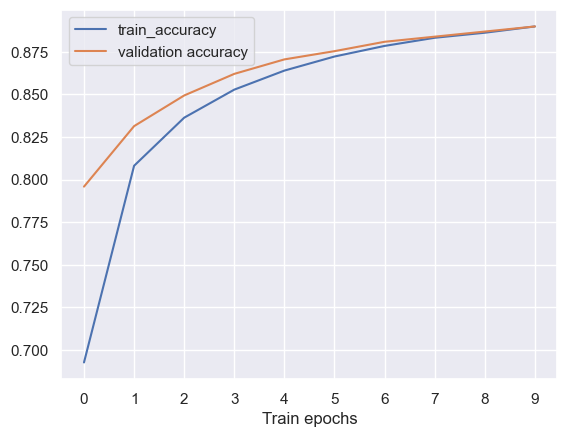

Training accuracy: 0.8898
Validation accuracy: 0.8898


In [7]:
def train_and_evaluate(data='digits',
                       hidden_layer_sizes=[],
                       activation='tanh',
                       optimizer='Adam',
                       learning_rate=0.01,
                       metric='accuracy',
                       num_epochs=10):

  # Build the model.
    model = build_model(n_classes=10,
                      hidden_layer_sizes=hidden_layer_sizes,
                      activation=activation,
                      optimizer=optimizer,
                      metric=metric,
                      learning_rate=learning_rate)

  # Select the dataset.
    if data == 'digits':
        #print("digits")
        X_train = X_train_digits
        X_test = X_test_digits
        Y_train = Y_train_digits
        Y_test = Y_test_digits
        #print(X_train.shape)
        #print(Y_train.shape)
    
    elif data == 'fashion':
        X_train = X_train_fashion
        X_test = X_test_fashion
        Y_train = Y_train_fashion
        Y_test = Y_test_fashion
    else:
        raise 'Unsupported dataset: %s' %data
    # Flatten the images (from 28x28 to 784) for both training and test sets
    X_train = X_train.reshape(X_train.shape[0], -1)  # Flatten training images (60000, 28, 28) to (60000, 784)
    X_test = X_test.reshape(X_test.shape[0], -1)    # Flatten test images (10000, 28, 28) to (10000, 784)
    
    # Normalize the data
    X_train = X_train / 255.
    X_test = X_test / 255.
  # Train the model.
    print('Training the', data, 'model...')
    history = model.fit(
        x=X_train,
        y=Y_train,
        epochs=num_epochs,
        batch_size=64,
        validation_split=0.1,
        verbose=0)

    # Retrieve the training metrics (after each train epoch) and the final validation
    # accuracy.
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    plt.plot(train_accuracy, label='train_accuracy')
    plt.plot(val_accuracy, label='validation accuracy')
    plt.xticks(range(num_epochs))
    plt.xlabel('Train epochs')
    plt.legend()
    plt.show()
    
    print('Training accuracy: %1.4f' %train_accuracy[-1])
    print('Validation accuracy: %1.4f' %val_accuracy[-1])
    
    return model


# run the function
model = train_and_evaluate()

### <span style="color:chocolate">Exercise 3:</span> Ablation study (50 points)

1. Conduct experiments and record the training and validation set accuracy results in the table below. You may extend the table for additional experiments as needed.
2. Report the hyperparameter values for your preferred architecture configuration.
3. Run the model once more using your preferred hyperparameter configuration.

Data | Hidden sizes | Activation| Optimizer | Learning rate | #Parameters | Training accuracy| Validation accuracy
-|-|-|-|-|-|-|-
 digits | [] | tanh | SGD |0.01| 7850 | 0.1120 | 0.1158
 digits | [] | relu | SGD |0.01| 7850 | 0.1120 | 0.1158
 digits | [] | relu | Adam |0.01| 7850 | 0.8898 | 0.8898
 digits | [128] | relu | Adam |0.01| 101770 | 0.9719 | 0.9672
 digits | [256, 128] | relu | Adam |0.01| 235146 |  0.9834 | 0.9717
-|-|-|-|-|-|-|-
 fashion | [] | tanh | SGD |0.01| 7850 | 0.2542 | 0.1957
 fashion | [] | relu | SGD |0.01| 7850 | 0.2210 | 0.1822
 fashion | [] | relu | Adam |0.01| 7850 | 0.8136 | 0.8028
 fashion | [128] | relu | Adam |0.01| 101770 | 0.8850 | 0.8683
 fashion | [256, 128] | relu | Adam |0.01| 235146 | 0.8949 | 0.8768



Running experiment with hidden layer sizes: [], activation: tanh, optimizer: SGD, learning rate: 0.01
Training the digits model...


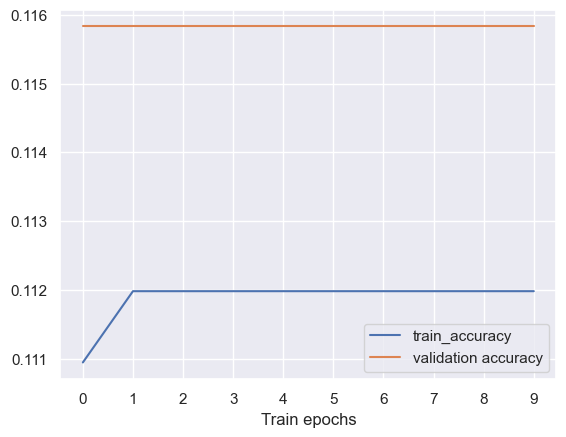

Training accuracy: 0.1120
Validation accuracy: 0.1158
Number of parameters: 7850
Training accuracy: 0.11198148131370544, Validation accuracy: 0.1158333346247673


Running experiment with hidden layer sizes: [], activation: relu, optimizer: SGD, learning rate: 0.01
Training the digits model...


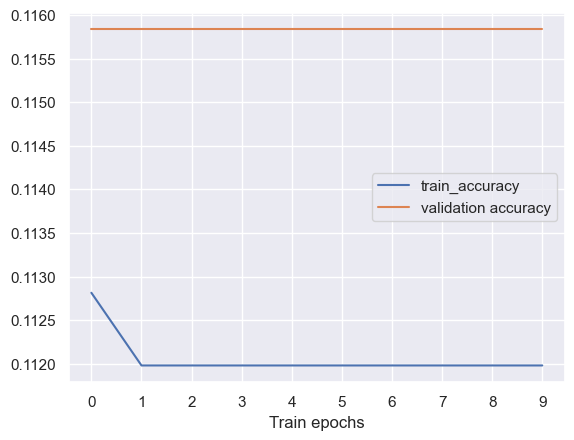

Training accuracy: 0.1120
Validation accuracy: 0.1158
Number of parameters: 7850
Training accuracy: 0.11198148131370544, Validation accuracy: 0.1158333346247673


Running experiment with hidden layer sizes: [], activation: relu, optimizer: Adam, learning rate: 0.01
Training the digits model...


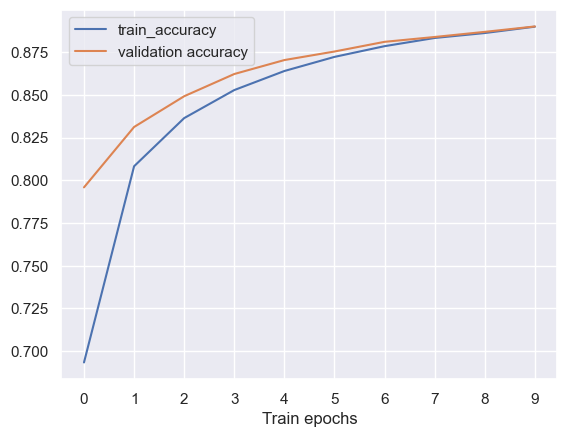

Training accuracy: 0.8899
Validation accuracy: 0.8900
Number of parameters: 7850
Training accuracy: 0.8898703455924988, Validation accuracy: 0.8899999856948853


Running experiment with hidden layer sizes: [128], activation: relu, optimizer: Adam, learning rate: 0.01
Training the digits model...


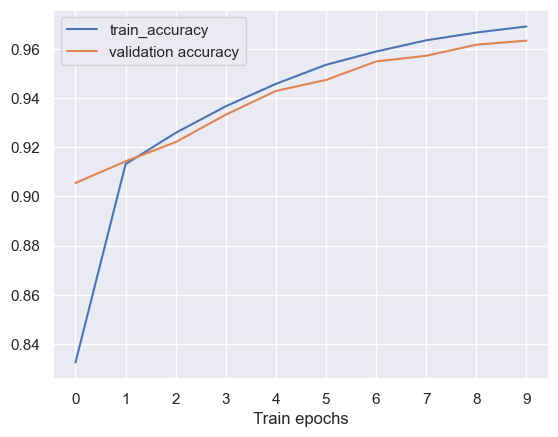

Training accuracy: 0.9693
Validation accuracy: 0.9635
Number of parameters: 101770
Training accuracy: 0.9692777991294861, Validation accuracy: 0.9635000228881836


Running experiment with hidden layer sizes: [256, 128], activation: relu, optimizer: Adam, learning rate: 0.01
Training the digits model...


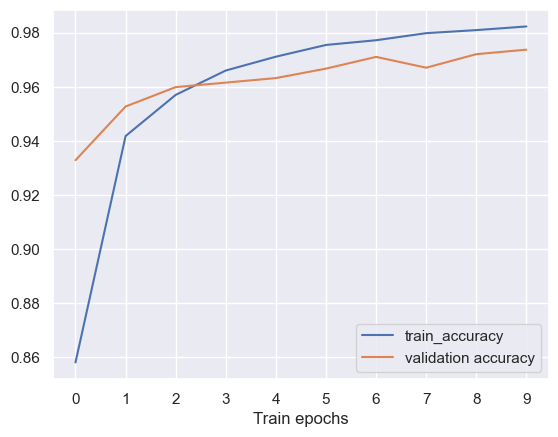

Training accuracy: 0.9822
Validation accuracy: 0.9737
Number of parameters: 235146
Training accuracy: 0.9822407364845276, Validation accuracy: 0.9736666679382324


In [8]:
# YOUR CODE HERE
# Loop through the combinations of hyperparameters
hyperparams = [
    ([], 'tanh', 'SGD', 0.01),
    ([], 'relu', 'SGD', 0.01),
    ([], 'relu', 'Adam', 0.01),
    ([128], 'relu', 'Adam', 0.01),
    ([256, 128], 'relu', 'Adam', 0.01)
]

for hidden_layer_sizes, activation, optimizer, lr in hyperparams:
    print(f"\n\nRunning experiment with hidden layer sizes: {hidden_layer_sizes}, activation: {activation}, optimizer: {optimizer}, learning rate: {lr}")
    model = train_and_evaluate(data='digits',
                               hidden_layer_sizes=hidden_layer_sizes,
                               activation=activation,
                               optimizer=optimizer,
                               learning_rate=lr)
    
    # Get the number of parameters
    num_parameters = model.count_params()
    print(f"Number of parameters: {num_parameters}")
    
    # Get training and validation accuracy
    
    train_accuracy = model.history.history['accuracy'][-1]
    val_accuracy = model.history.history['val_accuracy'][-1]
    print(f"Training accuracy: {train_accuracy}, Validation accuracy: {val_accuracy}")




Running experiment with hidden layer sizes: [], activation: tanh, optimizer: SGD, learning rate: 0.01
Training the fashion model...


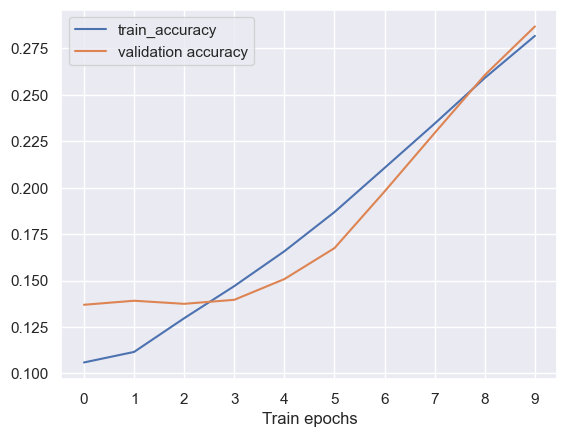

Training accuracy: 0.2818
Validation accuracy: 0.2868
Number of parameters: 7850
Training accuracy: 0.28175926208496094, Validation accuracy: 0.28683334589004517


Running experiment with hidden layer sizes: [], activation: relu, optimizer: SGD, learning rate: 0.01
Training the fashion model...


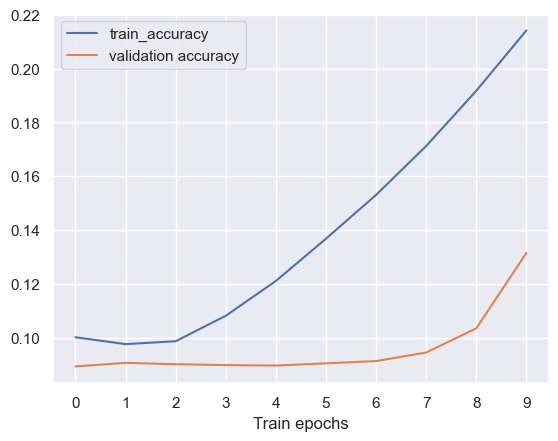

Training accuracy: 0.2142
Validation accuracy: 0.1315
Number of parameters: 7850
Training accuracy: 0.2141851782798767, Validation accuracy: 0.1315000057220459


Running experiment with hidden layer sizes: [], activation: relu, optimizer: Adam, learning rate: 0.01
Training the fashion model...


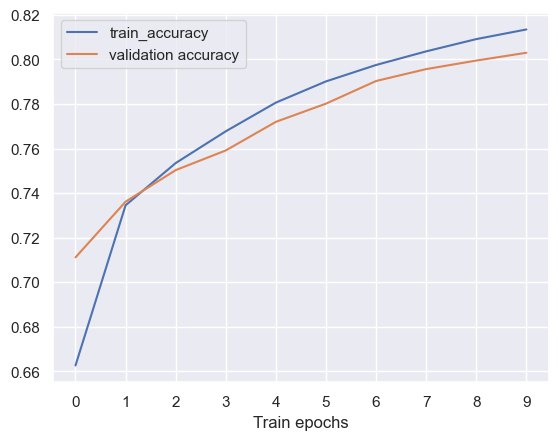

Training accuracy: 0.8135
Validation accuracy: 0.8030
Number of parameters: 7850
Training accuracy: 0.8134629726409912, Validation accuracy: 0.8029999732971191


Running experiment with hidden layer sizes: [128], activation: relu, optimizer: Adam, learning rate: 0.01
Training the fashion model...


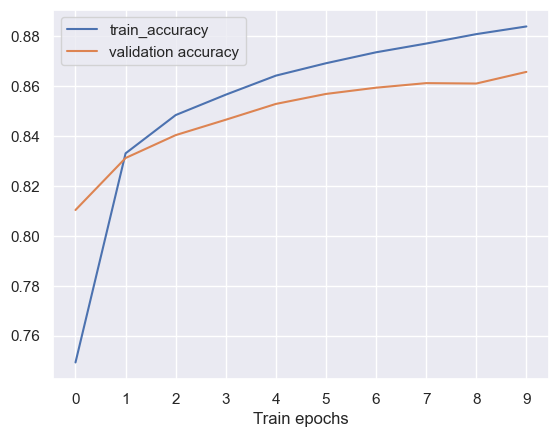

Training accuracy: 0.8839
Validation accuracy: 0.8657
Number of parameters: 101770
Training accuracy: 0.8838703632354736, Validation accuracy: 0.8656666874885559


Running experiment with hidden layer sizes: [256, 128], activation: relu, optimizer: Adam, learning rate: 0.01
Training the fashion model...


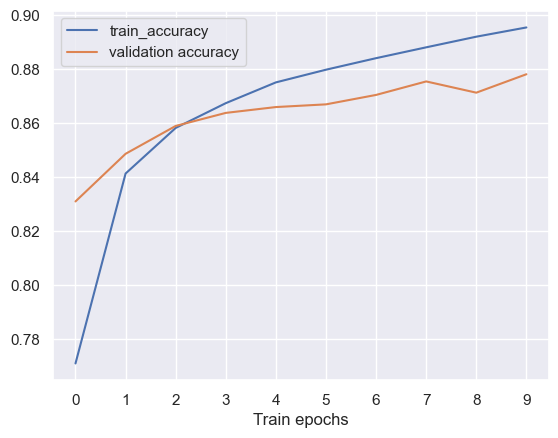

Training accuracy: 0.8955
Validation accuracy: 0.8782
Number of parameters: 235146
Training accuracy: 0.8955185413360596, Validation accuracy: 0.878166675567627


In [9]:
# Hyperparameter configurations for Fashion MNIST
hyperparams_fashion = [
    ([], 'tanh', 'SGD', 0.01),
    ([], 'relu', 'SGD', 0.01),
    ([], 'relu', 'Adam', 0.01),
    ([128], 'relu', 'Adam', 0.01),
    ([256, 128], 'relu', 'Adam', 0.01)
]

# Running the experiments
for hidden_layer_sizes, activation, optimizer, lr in hyperparams_fashion:
    print(f"\n\nRunning experiment with hidden layer sizes: {hidden_layer_sizes}, activation: {activation}, optimizer: {optimizer}, learning rate: {lr}")
    model = train_and_evaluate(data='fashion',
                               hidden_layer_sizes=hidden_layer_sizes,
                               activation=activation,
                               optimizer=optimizer,
                               learning_rate=lr)
    
    # Get the number of parameters in the model
    num_parameters = model.count_params()
    print(f"Number of parameters: {num_parameters}")
    
    # Get the training and validation accuracies
    train_accuracy = model.history.history['accuracy'][-1]  # Last epoch's training accuracy
    val_accuracy = model.history.history['val_accuracy'][-1]  # Last epoch's validation accuracy
    print(f"Training accuracy: {train_accuracy}, Validation accuracy: {val_accuracy}")


Answer 2. Reporting the hyperparameter values for preferred architecture configuration.

Based on the Training and validation accuracy reported for model for both digit and fashion data he preferred hyperparameter values would be:
<b> hidden layer sizes: [256, 128], activation: relu, optimizer: Adam, learning rate: 0.01 </b>



Answer 3. Re run the model using preferred hyperparameter configuration



Running experiment with hidden layer sizes: [256, 128], activation: relu, optimizer: Adam, learning rate: 0.01
Training the digits model...


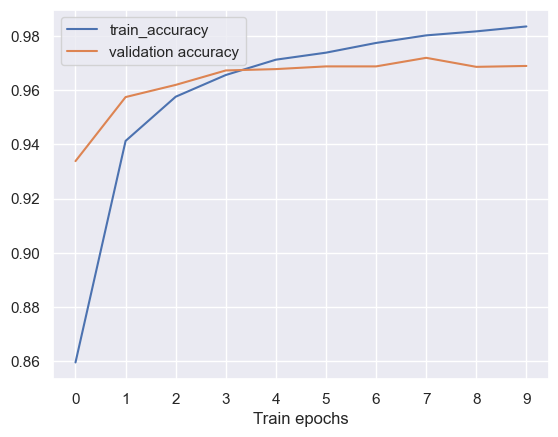

Training accuracy: 0.9836
Validation accuracy: 0.9690
Number of parameters: 235146
Training accuracy: 0.9835925698280334, Validation accuracy: 0.968999981880188


Running experiment with hidden layer sizes: [256, 128], activation: relu, optimizer: Adam, learning rate: 0.01
Training the fashion model...


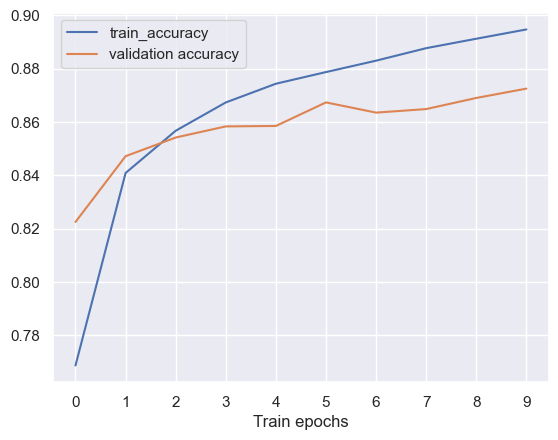

Training accuracy: 0.8947
Validation accuracy: 0.8725
Number of parameters: 235146
Training accuracy: 0.8946852087974548, Validation accuracy: 0.8725000023841858


In [10]:
# Hyperparameter configurations for Fashion MNIST
preferred_hyperparams = [
    ([256, 128], 'relu', 'Adam', 0.01)
    #([], 'tanh', 'SGD', 0.01),
    #([], 'relu', 'SGD', 0.01),
    #([], 'relu', 'Adam', 0.01),
    #([128], 'relu', 'Adam', 0.01),
    
]

# Running the experiments for digit
for hidden_layer_sizes, activation, optimizer, lr in preferred_hyperparams:
    print(f"\n\nRunning experiment with hidden layer sizes: {hidden_layer_sizes}, activation: {activation}, optimizer: {optimizer}, learning rate: {lr}")
    model_d = train_and_evaluate(data='digits',
                               hidden_layer_sizes=hidden_layer_sizes,
                               activation=activation,
                               optimizer=optimizer,
                               learning_rate=lr)
    
    # Get the number of parameters in the model
    num_parameters = model_d.count_params()
    print(f"Number of parameters: {num_parameters}")
    
    # Get the training and validation accuracies
    train_accuracy = model_d.history.history['accuracy'][-1]  # Last epoch's training accuracy
    val_accuracy = model_d.history.history['val_accuracy'][-1]  # Last epoch's validation accuracy
    print(f"Training accuracy: {train_accuracy}, Validation accuracy: {val_accuracy}")

# Running the experiments for fashion
for hidden_layer_sizes, activation, optimizer, lr in preferred_hyperparams:
    print(f"\n\nRunning experiment with hidden layer sizes: {hidden_layer_sizes}, activation: {activation}, optimizer: {optimizer}, learning rate: {lr}")
    model = train_and_evaluate(data='fashion',
                               hidden_layer_sizes=hidden_layer_sizes,
                               activation=activation,
                               optimizer=optimizer,
                               learning_rate=lr)
    
    # Get the number of parameters in the model
    num_parameters = model.count_params()
    print(f"Number of parameters: {num_parameters}")
    
    # Get the training and validation accuracies
    train_accuracy = model.history.history['accuracy'][-1]  # Last epoch's training accuracy
    val_accuracy = model.history.history['val_accuracy'][-1]  # Last epoch's validation accuracy
    print(f"Training accuracy: {train_accuracy}, Validation accuracy: {val_accuracy}")

---
### Step 6: Evaluation and Generalization

### <span style="color:chocolate">Exercise 4:</span> Compute metrics (25 points)

Now that you've determined the optimal set of hyperparameters, it's time to evaluate your optimized model on the test data to gauge its performance in real-world scenarios, commonly known as inference.

1. Calculate accuracy on both train and test datasets. Note: you will need to convert the vector of predicted probabilities to a class label using the argmax operation. Hint: You can utilize the <span style="color:chocolate">model.predict()</span> method provided by tf.keras and the <span style="color:chocolate">np.max()</span> method available in NumPy; or you can use the <span style="color:chocolate">model.evaluare()</span> method provided by tf.keras directly.

2. Does the model demonstrate strong generalization capabilities? Provide an explanation based on your accuracy observations.

In [ ]:
# YOUR CODE HERE
# Evaluate the model for fashion data set
X_train = X_train_fashion
X_test = X_test_fashion
Y_train = Y_train_fashion
Y_test = Y_test_fashion
# Flatten the images (from 28x28 to 784) for both training and test sets
X_train = X_train.reshape(X_train.shape[0], -1)  # Flatten training images (60000, 28, 28) to (60000, 784)
X_test = X_test.reshape(X_test.shape[0], -1)    # Flatten test images (10000, 28, 28) to (10000, 784)
# Normalize the data
X_train = X_train / 255.
X_test = X_test / 255.
train_loss, train_accuracy = model.evaluate(X_train, Y_train, verbose=0)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")


Training Accuracy: 0.8974
Test Accuracy: 0.8727


In [ ]:
# Eval the model on digit data set
X_train = X_train_digits
X_test = X_test_digits
Y_train = Y_train_digits
Y_test = Y_test_digits
# Flatten the images (from 28x28 to 784) for both training and test sets
X_train = X_train.reshape(X_train.shape[0], -1)  # Flatten training images (60000, 28, 28) to (60000, 784)
X_test = X_test.reshape(X_test.shape[0], -1)    # Flatten test images (10000, 28, 28) to (10000, 784)
# Normalize the data
X_train = X_train / 255.
X_test = X_test / 255.
train_loss, train_accuracy = model_d.evaluate(X_train, Y_train, verbose=0)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate the model on the test dataset
test_loss, test_accuracy = model_d.evaluate(X_test, Y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9777
Test Accuracy: 0.9687


2. Does the Model Demonstrate Strong Generalization Capabilities?

Answer: Since the model achieves similar accuracy on the training set and the test set on both fashion and digit data sets with values of (89% and 87%) & (97% and 96%) respectively, it demonstrates strong generalization capabilities.
It suggests that the model has learned patterns that are not specific to the training data but are applicable to unseen data.